<h2><center>Week 3 - Assignment</center></h2>
<h3><center>Programming for Data Science 2025</center></h3>

Exercises for the topics covered in the third lecture.

The exercise will be marked as passed if you get **at least 10/18** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Annina Helmy + Markus Anwander = *HelmyAnnina_AnwanderMarkus.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For question about the lecture content or exam, contact: *annina.helmy@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Lecture XY*.
For questions about the excercise/grading of excercises, contact: *thea.waldleben@students.unibe.ch* or *patricia.gribi@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Excercise XY*.
**Deadline: 14:00, March 13, 2025.**

<h3 style="text-align:left;">Exercise 1 - Error investigation<span style="float: right">2 points</span></h3>

The code below squares and sums the numbers in the array *arr*, and holds the result in the variable *squared_sum*, which should be 1135. However, that is not the case. Correct the code and explain in a comment , clearly and amply, what was wrong.

In [4]:
import numpy as np

arr = np.array([13, 14, 15, 16, 17], dtype=np.int8)
squared_sum = np.sum(arr ** 2)
squared_sum

np.int64(-145)

In [5]:
###
# YOUR COMMENT HERE
# The code does not work beacuse the dtype of the array is np.int8, which is not enough to store the squared sum of the array.
# we can fix the code by casting the array before squaring it.
###
squared_sum = np.sum(arr.astype(np.int64) ** 2)
squared_sum

np.int64(1135)

<h3 style="text-align:left;">Exercise 2 - Vacation selector<span style="float: right">3 points</span></h3>

The code below defines five vacation destinations (*locations*) and four attributes for each (*attributes*). Each row describes one destination, and the columns represent scores on the factors scenery, activities, food, and nightlife.

Write a function *vacation_advisor* that asks the user whether they find each of the attributes important or not, and suggests the best vacation spot based on these preferences.

Use techniques from the third lecture to solve the exercise.

Example interaction:
```python
Is scenery important to you [y/n]?    > y
Is activities important to you [y/n]? > y
Is food important to you [y/n]?       > n
Is nightlife important to you [y/n]?  > n
Based on your preferences, the best destination is Australia
```

In [6]:
# List of destinations
locations = np.array([ "Hawaii", "Thailand", "Italy", "Australia", "Japan" ])

# List of attributes for each destination. Each column is an attribute. Each row a destination.
attributes = np.array([
    [8, 8, 7, 6],
    [7, 9, 8, 7],
    [8, 6, 9, 7],
    [9, 8, 8, 6],
    [7, 9, 7, 8]
])

# Declare attribute names and initialize boolean array with preferences
attribute_names = ['scenery', 'activities', 'food', 'nightlife']


In [7]:
###
# YOUR CODE GOES HERE
def vacation_advisor():
    mask = np.array([input(f'Is {attribute} important to you [y/n]').lower() == 'y' for attribute in attribute_names])
    best_destination = locations[np.argmax(attributes[:,mask].sum(axis=1))]
    print(f'Based on your preferences, the best destination is {best_destination}')
    return best_destination

_ = vacation_advisor()
###

Based on your preferences, the best destination is Italy


<h3 style="text-align:left;">Exercise 3 - Indexing<span style="float: right">3 points</span></h3>

You have two arrays of the same length: temperature *temp*, and humidity, *rh*. Write a program that:
1) Substitutes the values of *temp* for which the corresponding values of *rh* is less than 0.3 with *np.nan*.
2) On this new temperature array, calculate the mean value (do **not** calculate it on the original array).

As an example:

```python
temp = [70, 80, 90]
rh = [0.5, 0.2, 0.6]

temp_nan --> [70, np.nan, 90]
temp_avg --> 80
```

In [22]:
# Generate some surrogate data

np.random.seed(29041996)  # Make sure we all have the same data
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 80 + 2 * np.random.randn(100)
rh = np.abs(0.1 * np.cos(np.linspace(0, 4 * np.pi, 100)) 
            + 0.3 + 0.05 * np.random.randn(100))

In [24]:
###
# YOUR CODE GOES HERE
###
print(np.mean(temp))
def filter(temp):
     temp[rh<0.3] = np.nan
     return temp


newTemp = filter(temp)
ave = np.nanmean(newTemp)
print(ave)





80.18132789061056
79.00078388998652


<h3 style="text-align:left;">Exercise 4 - Base converter<span style="float: right">2 points</span></h3>

Write a function *int_to_bin* that takes a positive integer as input and returns the binary equivalent of that integer.

You can **not** use built-in methods such as *bin()* in your solution.

In [17]:
###
# YOUR CODE GOES HERE
def int_to_bin(n : int) -> str:
    assert n >= 0, 'n must be a positive integer'
    binary = ''
    # handle this case seperately because otherwise we would return the empty string for n = 0
    if n == 0:
        return '0'
    while n > 0:
        #n&2 is the remainder of the division by 2
        binary = str(n % 2) + binary
        # right shift n by 1
        n = n >> 1
    return binary

print(int_to_bin(10))
print(int_to_bin(0))
print(int_to_bin(255))
###


1010
0
11111111


<h3 style="text-align:left;">Exercise 5 - Broadcasting<span style="float: right">2 points</span></h3>

Reshape *a* so it is possible to multiply *a* and *b*, and explain why you had to reshape *a* to be able to multiply the two arrays.

In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([2, 3])
print(a.shape)
print(b.shape)
a = np.reshape(a,(3,2))
print(a.shape)
print(np.multiply(a,b))

###
# YOUR CODE GOES HERE
###


(2, 3)
(2,)
(3, 2)
[[ 2  6]
 [ 6 12]
 [10 18]]


In [ ]:
###
# YOUR COMMENT HERE
###

# It is a violation of broadcasting rule 3.
# Since the number of dimensions differs, the one with fewer dimensions will be padded with a one on the left (b.shape -> (1,2)) 
# Since a.shape = 2,3, b.shape = 1,2: rule 3 aplies on the second dimension since neither is 1

#reshaping a to (3,2) solves this problem, since a.shape = 3,2, b.shape = 1,2 --> second dimension is no longer different

<h3 style="text-align:left;">Exercise 6 - Find nearest neighbor <span style="float: right">3 points</span></h3>

Complete the missing functions to implement a k-Nearest Neighbors (k-NN) classifier from scratch.
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
Knn is a simple machine learning algorithm. It works by comparing new data points to existing ones and classifying them based on similarity (distance).

When a new data point is given, KNN calculates the distance between this point and all other points in the dataset.
The most common method is Euclidean distance. The algorithm selects the K closest points (neighbors) from the dataset.
For classification, the algorithm assigns the most common class among the K neighbors to the new data point (Majority Voting).

**Your task**:
1. Implement the Euclidean distance function.
2. Implement function to compute distance between a test point and all training points.
4. Run and test your implementation.

In [20]:
import matplotlib.pyplot as plt
# Dataset: [Feature1, Feature2, Class]
data = np.array([
    [2.0, 4.0, 0],
    [3.0, 3.0, 0],
    [6.0, 8.0, 1],
    [7.0, 9.0, 1],
    [4.0, 5.0, 0],
    [5.0, 6.0, 1],
    [3.0, 5.0, 0],
    [4.0, 6.0, 1],
])

Training data:
 [[2. 4.]
 [3. 3.]
 [6. 8.]
 [7. 9.]
 [4. 5.]
 [5. 6.]
 [3. 5.]
 [4. 6.]]
Labels: [0. 0. 1. 1. 0. 1. 0. 1.]


Text(0.5, 1.0, 'Training data')

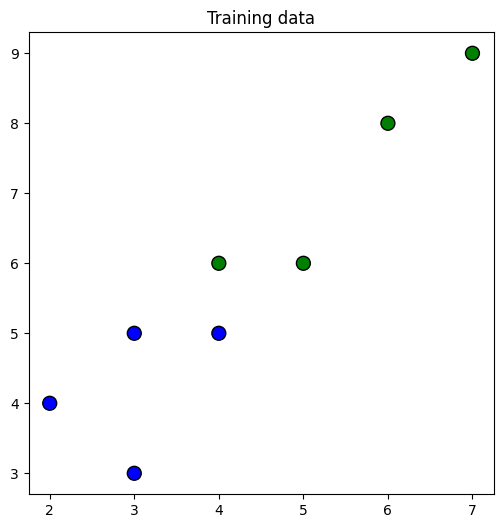

In [21]:
# Features and labels
X_train = data[:, :-1] # first two columns
y_train = data[:, -1] # last column

print("Training data:\n", X_train)
print("Labels:", y_train)
plt.figure(figsize=(6,6))
colors = ['blue' if label == 0 else 'green' for label in y_train]
plt.scatter(data[:, 0], data[:, 1], c=colors, edgecolors='black', s=100)
plt.title('Training data')

In [ ]:
# Euclidean distance
from collections import Counter

def euclidean_distance(p1, p2):
    """
    Calculate the Euclidean distance between two points.
    :param p1: coordinates of first point
    :param p2: coordinates of second point
    :return: Euclidean distance (float)
    """
    ## YOUR CODE GOES HERE
    return np.linalg.norm(p1 - p2) 
    # return np.sqrt(np.sum((p1 - p2) ** 2))

# Compute distance between all test points and all training points
def compute_distances(X_train, y_train, test_point):
    """
    Compute the Euclidean distance between a test point and all training points.
    :param X_train (numpy array): training data
    :param test_point (numpy array): test point
    :return list of tuples (distance, label) for each training point
    """
    ## YOUR CODE GOES HERE
    # simply iterate over each training point and calculate the distance between the training point and the test point
    return [(euclidean_distance(y, test_point), label) for y, label in zip(X_train, y_train)]

[(np.float64(4.272001872658765), np.float64(0.0)), (np.float64(3.905124837953327), np.float64(0.0)), (np.float64(2.5), np.float64(1.0)), (np.float64(3.640054944640259), np.float64(1.0)), (np.float64(2.0615528128088303), np.float64(0.0)), (np.float64(1.118033988749895), np.float64(1.0)), (np.float64(3.0413812651491097), np.float64(0.0)), (np.float64(2.0615528128088303), np.float64(1.0))]
Prediction for [6.  5.5]: 1.0


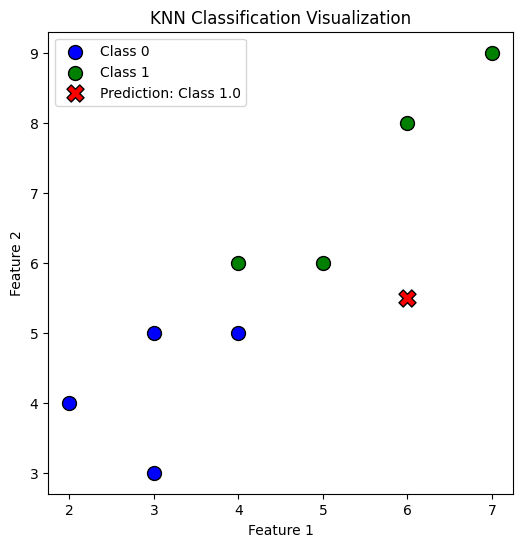

In [31]:
### FOR TESTING YOUR IMPLEMENTAITON - Run this Cell ###
def get_neighbors(X_train, y_train, test_point, k):
    distances = compute_distances(X_train, y_train, test_point)
    print(distances)
    distances.sort()
    neighbors = distances[:k]
    return neighbors

def predict(X_train, y_train,  test_point, k = 3 ):
    neighbors = get_neighbors(X_train, y_train, test_point, k)
    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)
    return most_common[0][0]

test_point = np.array([6, 5.5])
k = 3
prediction = predict(X_train, y_train, test_point, k)
print(f"Prediction for {test_point}: {prediction}")


## Plot the dataset
plt.figure(figsize = (6,6))

# Separate class 0 and class 1 points for labeling
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Scatter plot for training points with different colors
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', edgecolors='black', s=100, label="Class 0")
plt.scatter(class_1[:, 0], class_1[:, 1], c='green', edgecolors='black', s=100, label="Class 1")

# Mark test point
plt.scatter(test_point[0], test_point[1], c='red', edgecolors='black', s=150, label=f'Prediction: Class {prediction}', marker='X')

# Plot settings
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Classification Visualization")
plt.legend()
plt.show()

<h3 style="text-align:left;">Exercise 7 - Moving average (on paper) <span style="float: right">3 points</span></h3>

Given the array of values, *a*, we can calculate the moving average by averaging nearby values and repeating the procedure sliding along the array. Here's an example of a 3-point moving average (ignoring the edges), with a for loop:

In [24]:
a = np.round(30 + np.random.randn(20) * 2, 1)
print(a)

# Moving average
a_avg = np.zeros_like(a)
# We're just ignoring the edge effects here
for i in range(1, len(a) - 1):
    sub = a[i - 1:i + 2]
    a_avg[i] = sub.mean()
# For the first and last point, we use the original values.
a_avg[[0, -1]] = a[[0, -1]]
print(a_avg)

[35.3 30.8 32.2 29.8 28.7 28.2 33.6 31.3 28.6 31.3 28.5 28.6 30.8 29.4
 31.7 31.9 31.2 29.3 30.7 33.3]
[35.3        32.76666667 30.93333333 30.23333333 28.9        30.16666667
 31.03333333 31.16666667 30.4        29.46666667 29.46666667 29.3
 29.6        30.63333333 31.         31.6        30.8        30.4
 31.1        33.3       ]


Write a function *mov_avg* that takes an array in input and returns its 3-point moving average. You **have to use broadcasting** to compute the moving average. As in the example, use the original array values at the borders.

In [32]:
###
# YOUR CODE GOES HERE
def mov_avg(a : np.ndarray):
    avg = a.copy()
    avg[1:-1] += a[2:]
    avg[1:-1] += a[:-2]
    avg[1:-1] /= 3 # i guess this is a form of broadcasting, but i didn't find any other reasonable way to solve this exercise with boradcasting
    return avg    
###
print(mov_avg(a))

[35.3        32.76666667 30.93333333 30.23333333 28.9        30.16666667
 31.03333333 31.16666667 30.4        29.46666667 29.46666667 29.3
 29.6        30.63333333 31.         31.6        30.8        30.4
 31.1        33.3       ]
